## Exercises for Physical Models for Living Systems, week 1

Group members:
* Golan Rodrigo 1142802
* Zoppellari Elena 2076715

### Exercise 1

**Perform linear stability analysis of the deterministic logistic equation.**

The logistic equation is most often seen in ecology in the following form:
$$
\begin{equation}
\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right) .
\end{equation}
$$
To analyze the stability of the solutions we consider the equilibrium points $N^*$ where $\frac{dN}{dt} = 0$:

$$
\begin{equation}
rN \left(1 - \frac{N}{K}\right) = 0 \qquad \implies \qquad \begin{cases} N^*=0 \\ N^*=K \end{cases}
\end{equation}
$$

Intuitively it is clear by looking at the equation that $N^*$ is unstable since the time derivative is positive for $0<N<K$.
Proceeding more rigorously however we need to linearize the equation near the equilibrium points. Namely we consider small perturbations around them of the form $\delta N= N_t -N^*$ and the linearized system is just the result of a Taylor expansion $\dot{\delta N} = \left.J\right|_{N^*} \delta N$  .

The Jacobian matrix $J$ contains only the partial derivative with respect to $N$:

$$
\begin{equation}
J = \frac{d}{dN} \left(rN \left(1 - \frac{N}{K}\right)\right) = r\left(1 - \frac{2N}{K}\right).
\end{equation}
$$

For the stability analysis we need the Jacobian matrix evaluated in the equilibrium points (and eventually the sign of the eigenvalues):

$$
\begin{cases}
\left.J\right|_{N^*=0}=r>0  \\
\left.J\right|_{N^*=K}=-r<0 
\end{cases}
$$


So, the stability analysis confirms the initial intuition: $N^* = 0$ is unstable whereas $N^* = K$ is stable.


### Exercise 2

**Perform the quasi stationary approximation of the consumer resource model with 1 species and 1 resources for the abiotic case. Check the analytical result with simulations.**

The Consumer Resource Model with 1 species and 1 abiotic resource is described by the following system of differential equation:

$$
\begin{cases}
  \frac{dN}{dt} =& (\gamma c R - d) N \qquad,\\ 
  \\
  \frac{dR}{dt} =& -cNR + \mu(R) \\
\end{cases}
$$

where:

- $\gamma$ is an efficiency constant related to how much the resource up-taken are used for growth

- c is an efficiency constant related to the fraction of the resource consumed

- d is the death rate

- $\mu(R) = \dfrac{R}{k_s + R}$ is the Monod function and $k_s$  is the saturation constant.






In order to simplify the model we make the <b style="font-size: 15px">Quasi-static approximation</b>, that is, when the population changes the resource will quickly reach a new equilibrium before the population can change again. This is summarized by the relation $\frac{ \it{d}R}{\it{dt}} = 0$. 

The stationary solution $R^*$ can be easily found:

$$
\begin{equation}
0 = \frac{R}{k_s + R} - RcN \bigg\vert_{R = R^*} \quad \implies \quad R^* = \frac{1 - cNk_s}{cN}
\end{equation}
$$
Therefore the equation for the population variation now yields:

$$
\begin{equation}
\frac{dN}{dt} = N(\gamma c R^* - d) = 
 N\left(\frac{\gamma c}{cN}(1 - cNk_s) - d\right) 
= \gamma - (\gamma c k_s + d)N .
\end{equation}
$$
This is a differential equation of the type:

$$
\begin{equation}
\frac{dN}{dt} = a - bN \quad \implies \quad N(t)=\left(N_0-\frac{a}{b}\right)e^{-bt}+\frac{a}{b}
\end{equation}
$$

So finally the solution of the QSA of the Consumer Resource Model with 1 species and 1 abiotic resource is given by:
$$
\begin{equation}
    R^* = \frac{1-cNk_s}{cN} , \\
    \\
    N(t) =  (N_0 -\frac{\gamma}{\gamma c k_s + d} ) e^{-t(\gamma c k_s + d)} + \frac{\gamma}{\gamma c k_s + d} . \\  
\end{equation}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
from scipy.integrate import simps
from scipy.integrate import solve_ivp
from scipy.special import gamma as g

To validate the previously proposed solution, we conducted simulations for both the Quasi-Stationary Approximation (QSA) Ordinary Differential Equation (ODE) and the original ODE system using the 4th-order Runge-Kutta method.

In the `rk_system` function, which is responsible for solving the system, there are three distinct operational modes:

* `mode == 0`: in this setting, the ODE system is solved in its entirety in the standard manner.

* `mode == 1`: when this option is activated, we update the value of $R$ once every 10 iteration steps. This approach is aimed at mimicking the behavior of the Quasi-Stationary Approximation (QSA) within the complete solution.

* `mode == 2`: in this scenario, the value of $R$ is also updated every 10 iterations, but it is constrained to match the stationary solution, denoted as $R^*$.

In [2]:
# we use the runge kutta method at 4th order to simulate the ode found with QSA 
def runge_kutta(f, t0, N0, t_end, h):
    N_values = [N0]
    t_values = [t0]
    while t0 < t_end:
        # Calculate the k values for N
        k1_N = h * f(t0, N0)
        k2_N = h * f(t0 + 0.5 * h, N0 + 0.5 * k1_N)
        k3_N = h * f(t0 + 0.5 * h, N0 + 0.5 * k2_N)
        k4_N = h * f(t0 + h, N0 + k3_N)
        
        # update the values of N
        N0 = N0 + (1/6) * (k1_N + 2*k2_N + 2*k3_N + k4_N)
        t0 += h
        t0 = round(t0,1)
        N_values.append(N0)
        t_values.append(t0)
        
    return t_values, N_values

# We solve the complete ODE system using runge kutta 
def rk_system(f1, f2, t0, R0, N0, t_end, h, mode):
    t_values = [t0]
    R_values = [R0]
    N_values = [N0]
    n_step = 10 # number of steps before update R (simulate QSA)

    while t0 < t_end:
        # We calculate for both R and N the k values at each order, step by step
        if round(t0/h,1)%n_step == 0 or mode==0:
            k1_R = h * f1(t0, R0, N0)
        k1_N = h * f2(t0, R0, N0)
        if round(t0/h,1)%n_step == 0 or mode==0:
            k2_R = h * f1(t0 + 0.5 * h, R0 + 0.5 * k1_R, N0 + 0.5 * k1_N)
        k2_N = h * f2(t0 + 0.5 * h, R0 + 0.5 * k1_R, N0 + 0.5 * k1_N)
        if round(t0/h,1)%n_step == 0 or mode==0:
            k3_R = h * f1(t0 + 0.5 * h, R0 + 0.5 * k2_R, N0 + 0.5 * k2_N)
        k3_N = h * f2(t0 + 0.5 * h, R0 + 0.5 * k2_R, N0 + 0.5 * k2_N)
        if round(t0/h,1)%n_step == 0 or mode==0:
            k4_R = h * f1(t0 + h, R0 + k3_R, N0 + k3_N)
        k4_N = h * f2(t0 + h, R0 + k3_R, N0 + k3_N)

        # Update the values of R and N
        N0 = N0 + (1/6) * (k1_N + 2*k2_N + 2*k3_N + k4_N)
        if round(t0/h,1)%n_step == 0 or mode==0:
            if mode==0 or mode==1:
                R0 = R0 + (1/6) * (k1_R + 2*k2_R + 2*k3_R + k4_R)
            if mode == 2:
                R0 = (1-c*N0*k)/(c*N0) #qsa condition

        t0 += h
        t0 = round(t0,1)
        t_values.append(t0)
        R_values.append(R0)
        N_values.append(N0)

    return t_values, R_values, N_values

# System of R(t) and N(t) ODEs
def R_t(t, R, N): 
    return -c * N * R + mu * R / (k + R)

def N_t(t, R, N):
    return N * (gamma * c * R - d)

# N(t) ODE for QSA approximation
def N_t_qsa(t, N):
    return mu*gamma - (gamma*c*k+d)*N

# Analytical solution for N(t) with QSA approximation
def N_t_qsa_sol(t, N0):
    return (N0-gamma/(gamma*c*k+d))*np.exp(-t*(gamma*c*k+d))+gamma/(gamma*c*k+d)

# Analytical expression for R*
def R_star(N):
    return (1-c*N*k)/(c*N)

In [3]:
# Define the initial conditions
t0 = 0
h = 0.1  # Step size
c = 0.05
mu = 1
k = 1
gamma = 1
d = 0.3
N_init = [1, 10, 50]

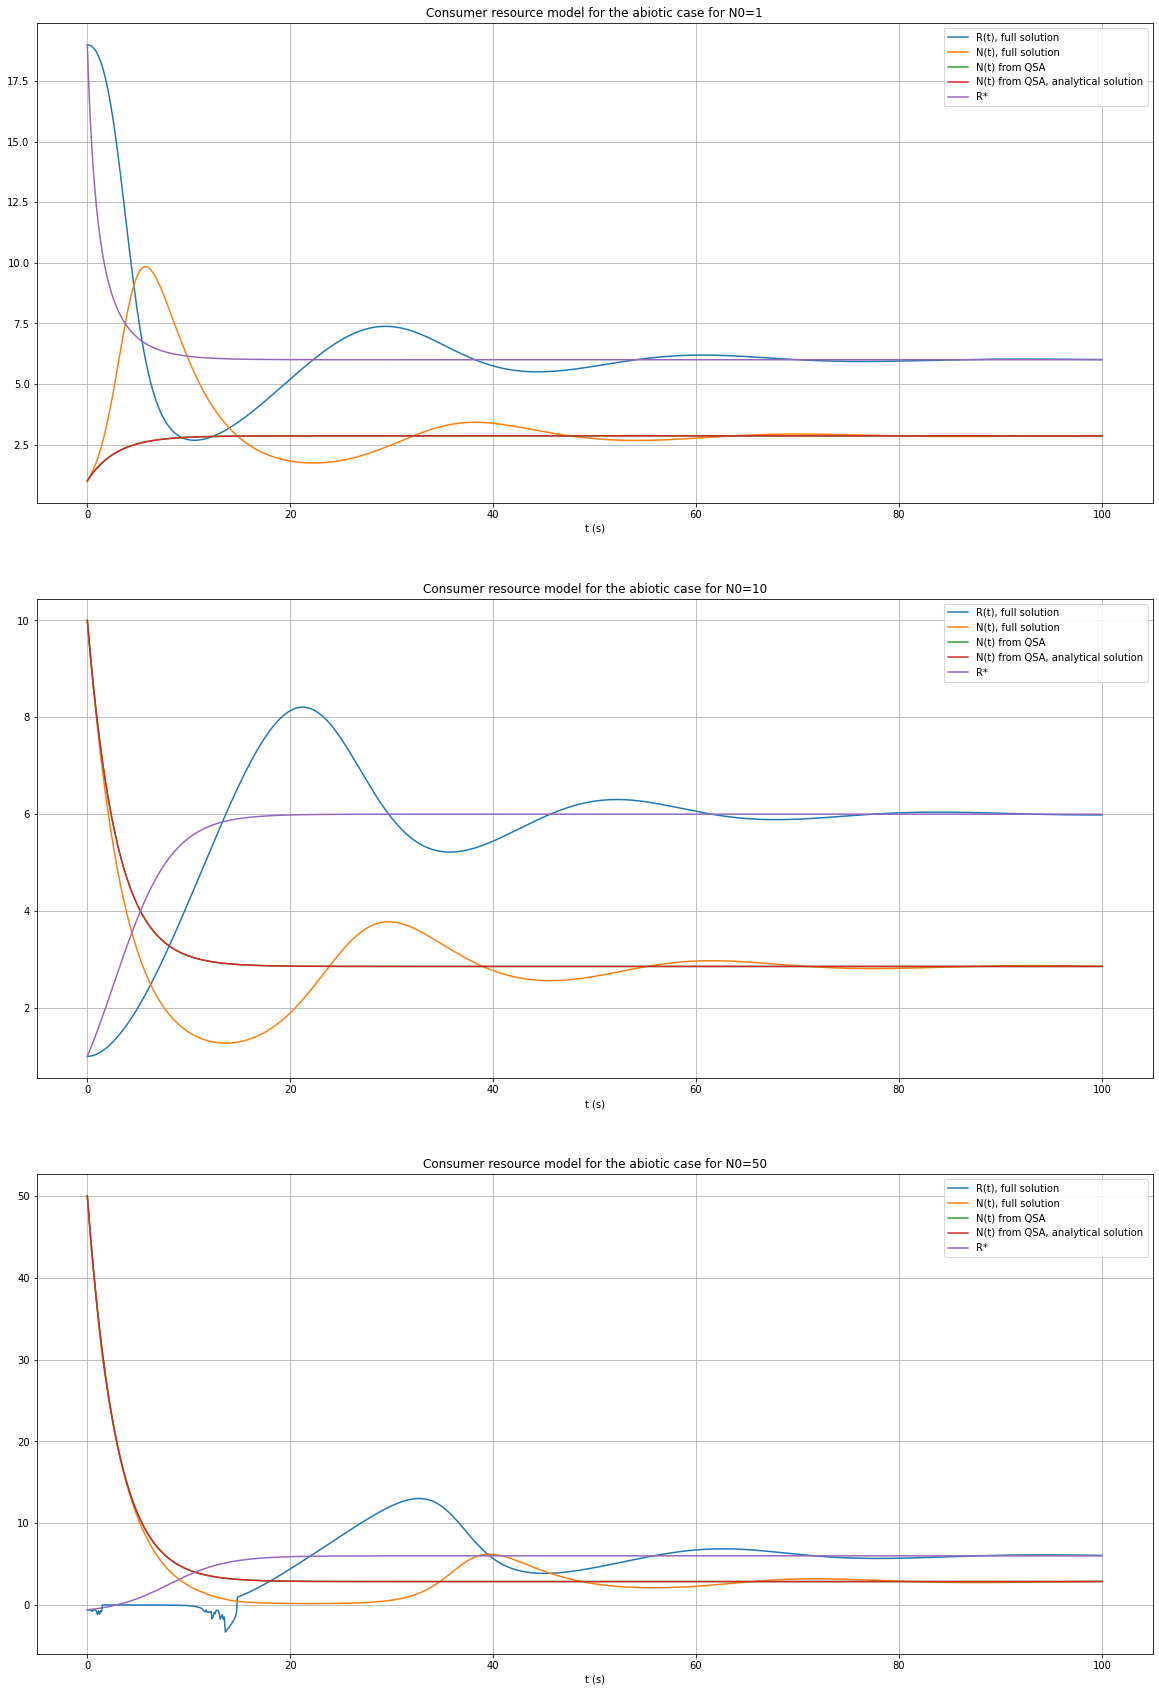

In [4]:
# Solutions for the full equations
t_end = 100
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,30))
for i in range(3):
    N0 = N_init[i]
    R0 = (1-c*N0*k)/(c*N0)
    # Solve the N(t) ODE
    t, N = runge_kutta(N_t_qsa, t0, N0, t_end, h)

    # Solve the system of ODEs R(t) N(t)
    t_values, R_values, N_values = rk_system(R_t, N_t, t0, R0, N0, t_end, h, 0)
    
    #Plots
    ax[i].plot(t_values, R_values, label='R(t), full solution')
    ax[i].plot(t_values, N_values, label='N(t), full solution')
    ax[i].plot(t, N, label='N(t) from QSA')
    ax[i].plot(t, N_t_qsa_sol(np.array(t_values), N0), label='N(t) from QSA, analytical solution')
    ax[i].plot(t, R_star(N_t_qsa_sol(np.array(t_values), N0)), label='R*')
    ax[i].set_xlabel('t (s)')
    ax[i].set_title('Consumer resource model for the abiotic case for N0={}'.format(N0))
    ax[i].legend()
    ax[i].grid(True)
plt.show()

In the three plots above, we show complete solutions for varying initial values of $R_0$. It is readily apparent that the analytical and numerical solutions for $N(t)_{QSA}$ perfectly coincide at all time points ($\forall t$). Furthermore, the complete solutions for $N(t)$ and $R(t)$ exhibit oscillations around the QSA solution and the stationary values of $R^*(N)$, respectively, until they converge, typically around $t \sim 100$ seconds.

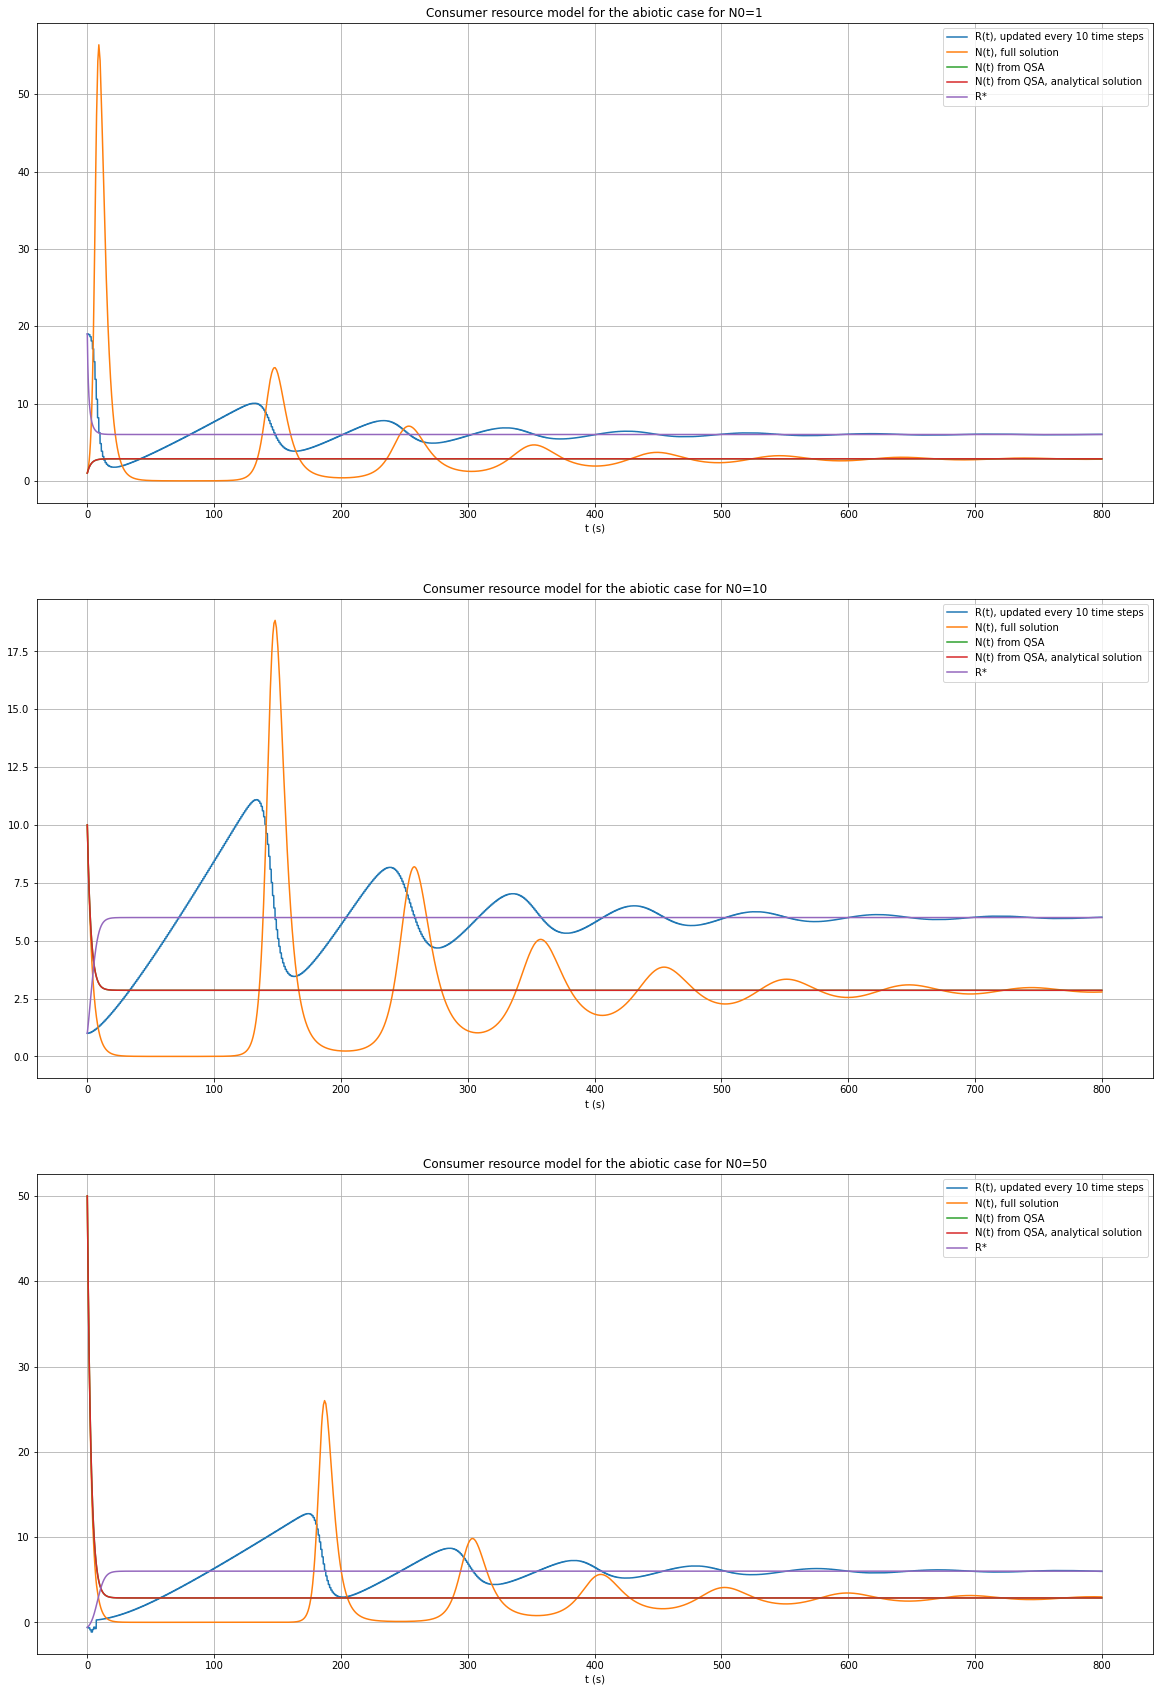

In [5]:
# Solutions introducing longer time steps for updating R
t_end = 800
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,30))
for i in range(3):
    N0 = N_init[i]
    R0 = (1-c*N0*k)/(c*N0)
    # Solve the N(t) ODE
    t, N = runge_kutta(N_t_qsa, t0, N0, t_end, h)

    # Solve the system of ODEs R(t) N(t)
    t_values, R_values, N_values = rk_system(R_t, N_t, t0, R0, N0, t_end, h, 1)
    
    #Plots
    ax[i].plot(t_values, R_values, label='R(t), updated every 10 time steps')
    ax[i].plot(t_values, N_values, label='N(t), full solution')
    ax[i].plot(t, N, label='N(t) from QSA')
    ax[i].plot(t, N_t_qsa_sol(np.array(t_values), N0), label='N(t) from QSA, analytical solution')
    ax[i].plot(t, R_star(N_t_qsa_sol(np.array(t_values), N0)), label='R*')
    ax[i].set_xlabel('t (s)')
    ax[i].set_title('Consumer resource model for the abiotic case for N0={}'.format(N0))
    ax[i].legend()
    ax[i].grid(True)
plt.show()

In the plot above, we've displayed the outcomes achieved by updating the values of $R$ every 10 time steps. It's evident that the oscillations of $N(t)$ around $N(t)_{QSA}$ are more pronounced compared to the oscillations of $R(t)$ around $R^*(N)$ for all time points. Additionally, it's worth noting that in this particular setup, the system requires a longer time to reach convergence, typically around $800$ seconds.

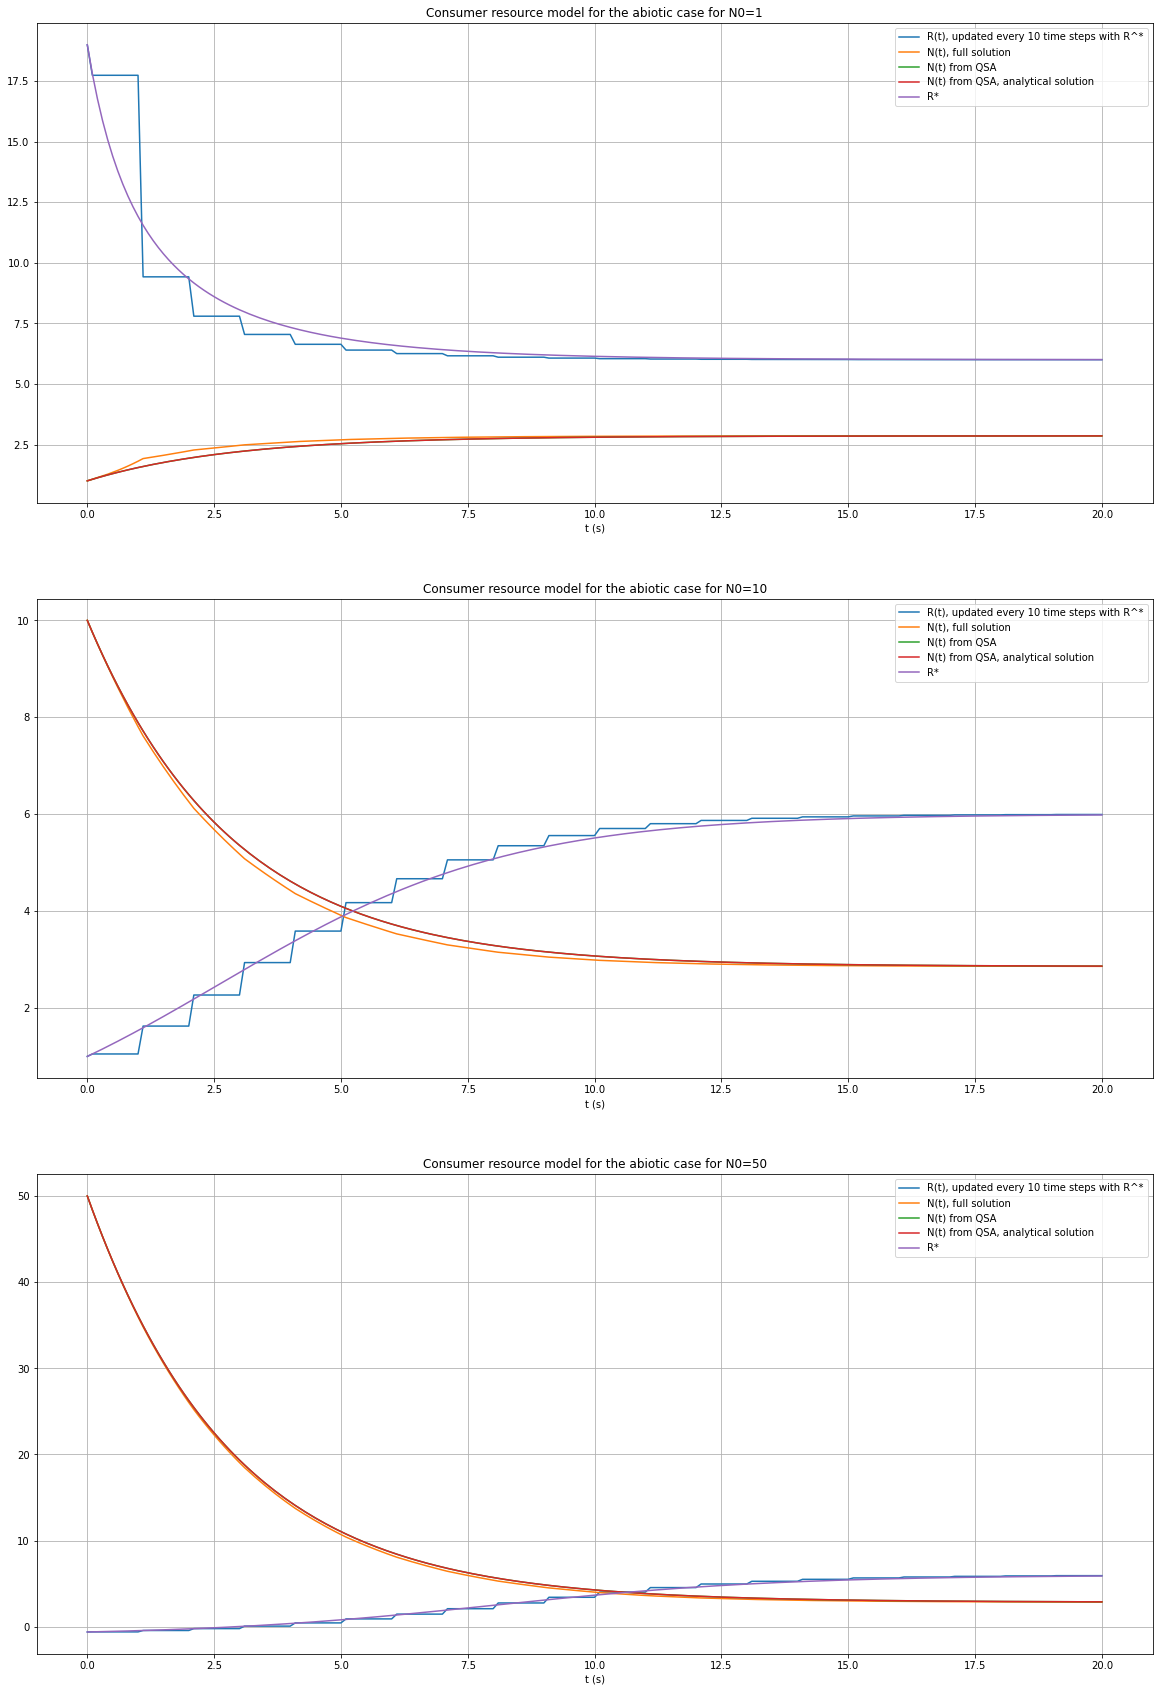

In [6]:
# Solutions introducing longer time steps for updating R with the equilibrium condition
t_end = 20
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,30))
for i in range(3):
    N0 = N_init[i]
    R0 = (1-c*N0*k)/(c*N0)
    # Solve the N(t) ODE
    t, N = runge_kutta(N_t_qsa, t0, N0, t_end, h)

    # Solve the system of ODEs R(t) N(t)
    t_values, R_values, N_values = rk_system(R_t, N_t, t0, R0, N0, t_end, h, 2)
    
    #Plots
    ax[i].plot(t_values, R_values, label='R(t), updated every 10 time steps with R^*')
    ax[i].plot(t_values, N_values, label='N(t), full solution')
    ax[i].plot(t, N, label='N(t) from QSA')
    ax[i].plot(t, N_t_qsa_sol(np.array(t_values), N0), label='N(t) from QSA, analytical solution')
    ax[i].plot(t, R_star(N_t_qsa_sol(np.array(t_values), N0)), label='R*')
    ax[i].set_xlabel('t (s)')
    ax[i].set_title('Consumer resource model for the abiotic case for N0={}'.format(N0))
    ax[i].legend()
    ax[i].grid(True)
plt.show()

In these final three plots, we present the outcomes of the ODE systems with the constraint of updating $R$ every 10 time steps based on the value $R^*(N(t_{n\%10=0}))$. This constraint naturally aligns the plot of $R(t)$ with the continuous curve of $R^*(N)$. More notably, it demonstrates that the complete solution for $N(t)$ under this constraint yields a solution that closely aligns with $N(t)_{QSA}$.

### Exercise 3a: Simulation of the Stochastic Logistic Equation (Fokker Planck equation)

**Simulate the stochastic logistic model in your computer and check that the stationary distribution is a Gamma distribution.**

We will first try to recover the analytic form of the stationary solution of the stochastic logistic growth through numerical methods, eyeing a possible Gamma solution with $\alpha=b_0/d$ and $\beta = (D \tau)^{-1}$, where $b_0=m+\sqrt{m}$. Firstly, the Fokker Planck equation yields:
$$
\begin{equation}
\frac{\partial P(x)}{\partial t} = -\frac{\partial}{\partial x} \left[ A(x)P(x) \right] + \frac{1}{2} \frac{\partial^2}{\partial x^2} \left[ B(x)P(x) \right] ,
\end{equation}
$$
where $A(x)= (b-d)\cdot x+m=-x \cdot \tau^{-1}+m$ and $B(x)=(b+d)\cdot x+m=D \cdot x+m$.
Quite a few trials have been made with different integrating methods and different parameters. First we will show a case in which the analytical solution (gamma distribution) is *seemingly* matched by the numerical solution of the PDE. While many solutions seem to exhibit a curve compatible with a gamma distribution, they have very different shapes and scales. We stress that the choice of parameters is paramount if one tries to highlight the resemblance to a specific gamma distribution.

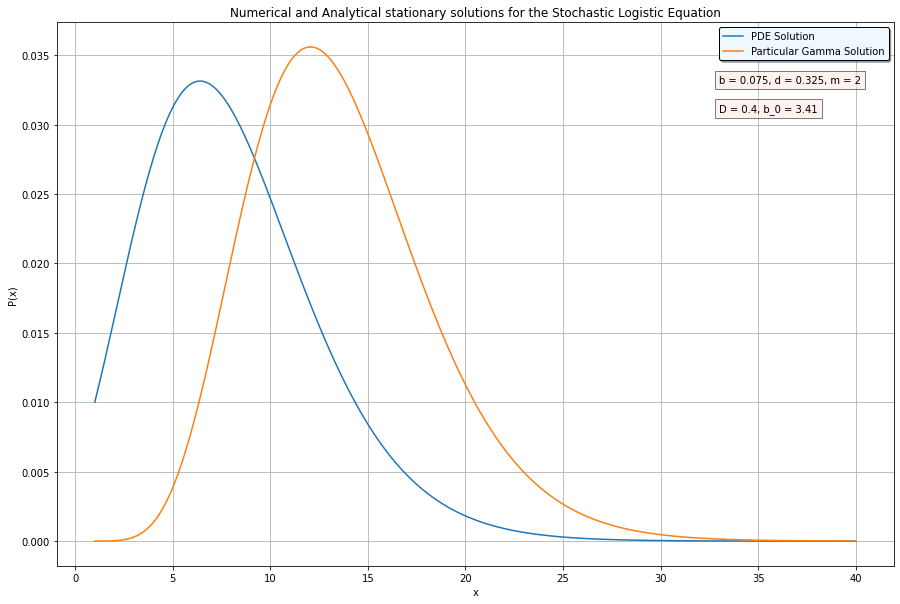

In [7]:
#Parameter definitions
b=0.075; d=0.325; m=2; D=b+d; tau=1/(d-b); b_0=(m)**0.5 + m

def A(x):
    return (b-d)*x +m

def B(x):
    return (b+d)*x +m

def pde(x, y):
    dydx = np.zeros((2, x.size))
    dydx[0] = y[1]
    dydx[1] = ((b-d)*y[0] + A(x)*y[1]-2*(b+d)*y[1])/B(x)
    return dydx

#boundary conditions (imposing P(0)=\= 0)
def bc(ya, yb):
    return np.array([ya[0]-0.01, yb[0]])  

x_min=1
x_max=40
num_points=1000
x = np.linspace(x_min, x_max, num_points)

initial_guess = np.random.random((2, x.size))
# initial_guess=np.zeros((2,x.size))
initial_guess[0:10]=1.0


solution = solve_bvp(pde, bc, x, initial_guess)

#Analytical gamma solution shown in class
def gamma_sol(x): 
    e=1/(g(b_0/D))
    f= (D*tau)**(-b_0/d)
    gi= x**(b_0/D -1)*np.exp(-x/(D*tau))
    a=e*f*gi
    return a
#Plot of the stationary solution
fig, ax=plt.subplots(figsize=(15,10))
ax.plot(x, solution.sol(x)[0], label="PDE Solution")
ax.plot(x, gamma_sol(x), label="Particular Gamma Solution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.legend(facecolor = 'aliceblue',shadow=True, edgecolor="black")
ax.set_title("Numerical and Analytical stationary solutions for the Stochastic Logistic Equation")
param_text = f"b = {b}, d = {d}, m = {m}"
param_text1= f"D = {D}, b_0 = {round(b_0, 2)}"
plt.text(33, 0.033, param_text, bbox=dict(facecolor = 'mistyrose', alpha=0.5))
plt.text(33, 0.031, param_text1, bbox=dict(facecolor= 'mistyrose', alpha=0.5))
plt.grid(True)
plt.show()


In order to explore in detail the possible numerical solutions, we have also solved the Fokker Planck equation with condition $\frac{\partial J}{\partial x}=0$ and we have confronted its solutions with the ones given by the original equation.
The resulting PDE is:
$$
\frac{\partial P(x,t)}{\partial x} = \frac{2P(x,t)(\frac{x}{\tau}+m)-DP(x,t)}{Dx+m}
$$

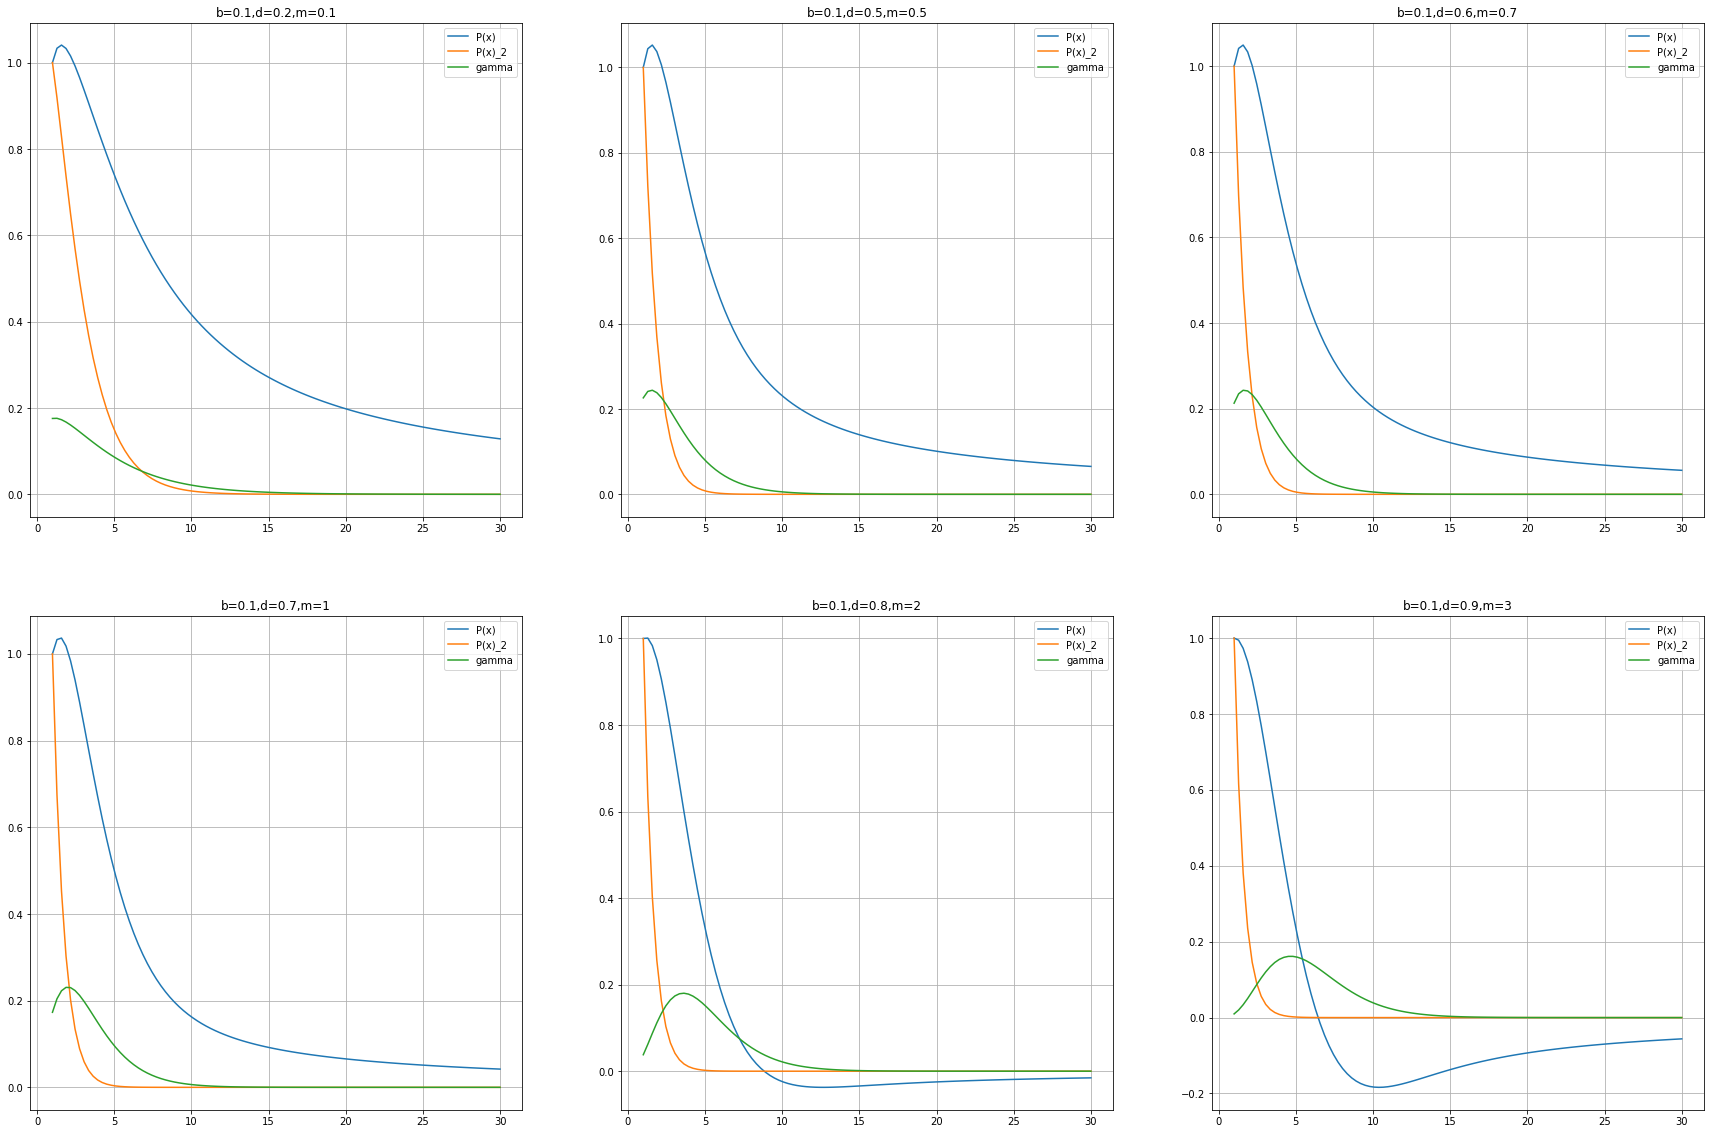

In [11]:
d_list = [0.2,0.5,0.6,0.7,0.8,0.9]
b = 0.1
m_list = [0.1,0.5,0.7,1,2,3]

def p1(x, z):
    return [z[1], ((b-d)*z[0]-z[1]*(2*(b+d)-x*(b-d)-m))/((b+d)*x+m)]

def p2(x,z):
    return -(2*z*(x/T+m)-D*z)/(D*x+m)

def gamma(x):
    a = b0/D
    beta = 1/(D*T)
    return beta**(a)/g(a)*x**(a-1)*np.exp(-beta*x)

t_range=np.linspace(1, 30,100)
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,20))
idx = 0
for i, di in enumerate(d_list):
    d = di
    m = m_list[i]
    b0=m+np.sqrt(m)
    D = (d+b)
    T = 1/(d-b)
    p_init = gamma(1)
    sol = solve_ivp(p1, [1, 30], [1, p_init], method='RK45', t_eval=t_range)
    sol_d = solve_ivp(p2, [1, 30], [1, p_init], method='RK45', t_eval=t_range)
    c = idx % 3
    r = idx // 3
    ax[r][c].plot(sol.t, sol.y[0,:], label='P(x)')
    ax[r][c].plot(sol_d.t, sol_d.y[0,:], label='P(x)_2')
    ax[r][c].plot(sol.t, gamma(sol.t), label='gamma')
    ax[r][c].set_title("b=0.1,d={},m={}".format(di,m))
    ax[r][c].grid(True)
    ax[r][c].legend()
    idx = idx + 1
plt.show()

The plot above shows that both the numerical solutions have a shape compatible with gamma distributions. Comparing them with the analytical curve, we can observe that the full solution resembles it better even if they seem to be in different scales. 

### Exercise 3b: Simulation of the Stochastic Logistic Equation (Langevin Equation)

In this section we attempt to simulate the Langevin equation for the stochastic logistic growth with enviromental noise. In said case the Longevin equation assumes the form:
$$
\begin{equation}
\dfrac{\mathcal{d}x}{\mathcal{d}t} \quad = \quad \dfrac{x}{\tau} \big( 1 - \dfrac{x}{k} \big) + \sqrt{\dfrac{\sigma}{\tau}}\cdot x \xi(t)
\end{equation}
$$ 
We will inspect the trajectories of the (numerically integrated) solutions and the dependence on different parameters, specifically the relation with the carrying capacity $k$ and the amount of stochasticity regulated by $\sigma$.

In [12]:
def rk_logistic(f1, t0, x0, t_end, h):
    t_values = [t0]
    x_values = [x0]

    while t0 < t_end:
        chi = np.random.normal(0,1,1)
        k1_x = h * f1(t0, x0, chi)
        k2_x = h * f1(t0 + 0.5 * h, x0 + 0.5 * k1_x, chi)
        k3_x = h * f1(t0 + 0.5 * h, x0 + 0.5 * k2_x, chi)
        k4_x = h * f1(t0 + h, x0 + k3_x, chi)

        # Update the values
        x0 = x0 + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)

        t0 += h
        t_values.append(t0)
        x_values.append(x0)

    return t_values, x_values

In [13]:
def ics(t,x,chi):
    return (x/T)*(1 - x/k) + np.sqrt(sigma/T) * x * np.random.normal(0,1, 1)

k_range = [1, 10, 100]
# initial parameters
d = 0.8
b = 0.3
T = 1/(d-b)
t0 = 0 
sigma_range = [0.01, 1]
x0_range = [5,20]
t_end_range = [10, 50, 100]
h = 0.1

C:\Users\Elena Zoppellari\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


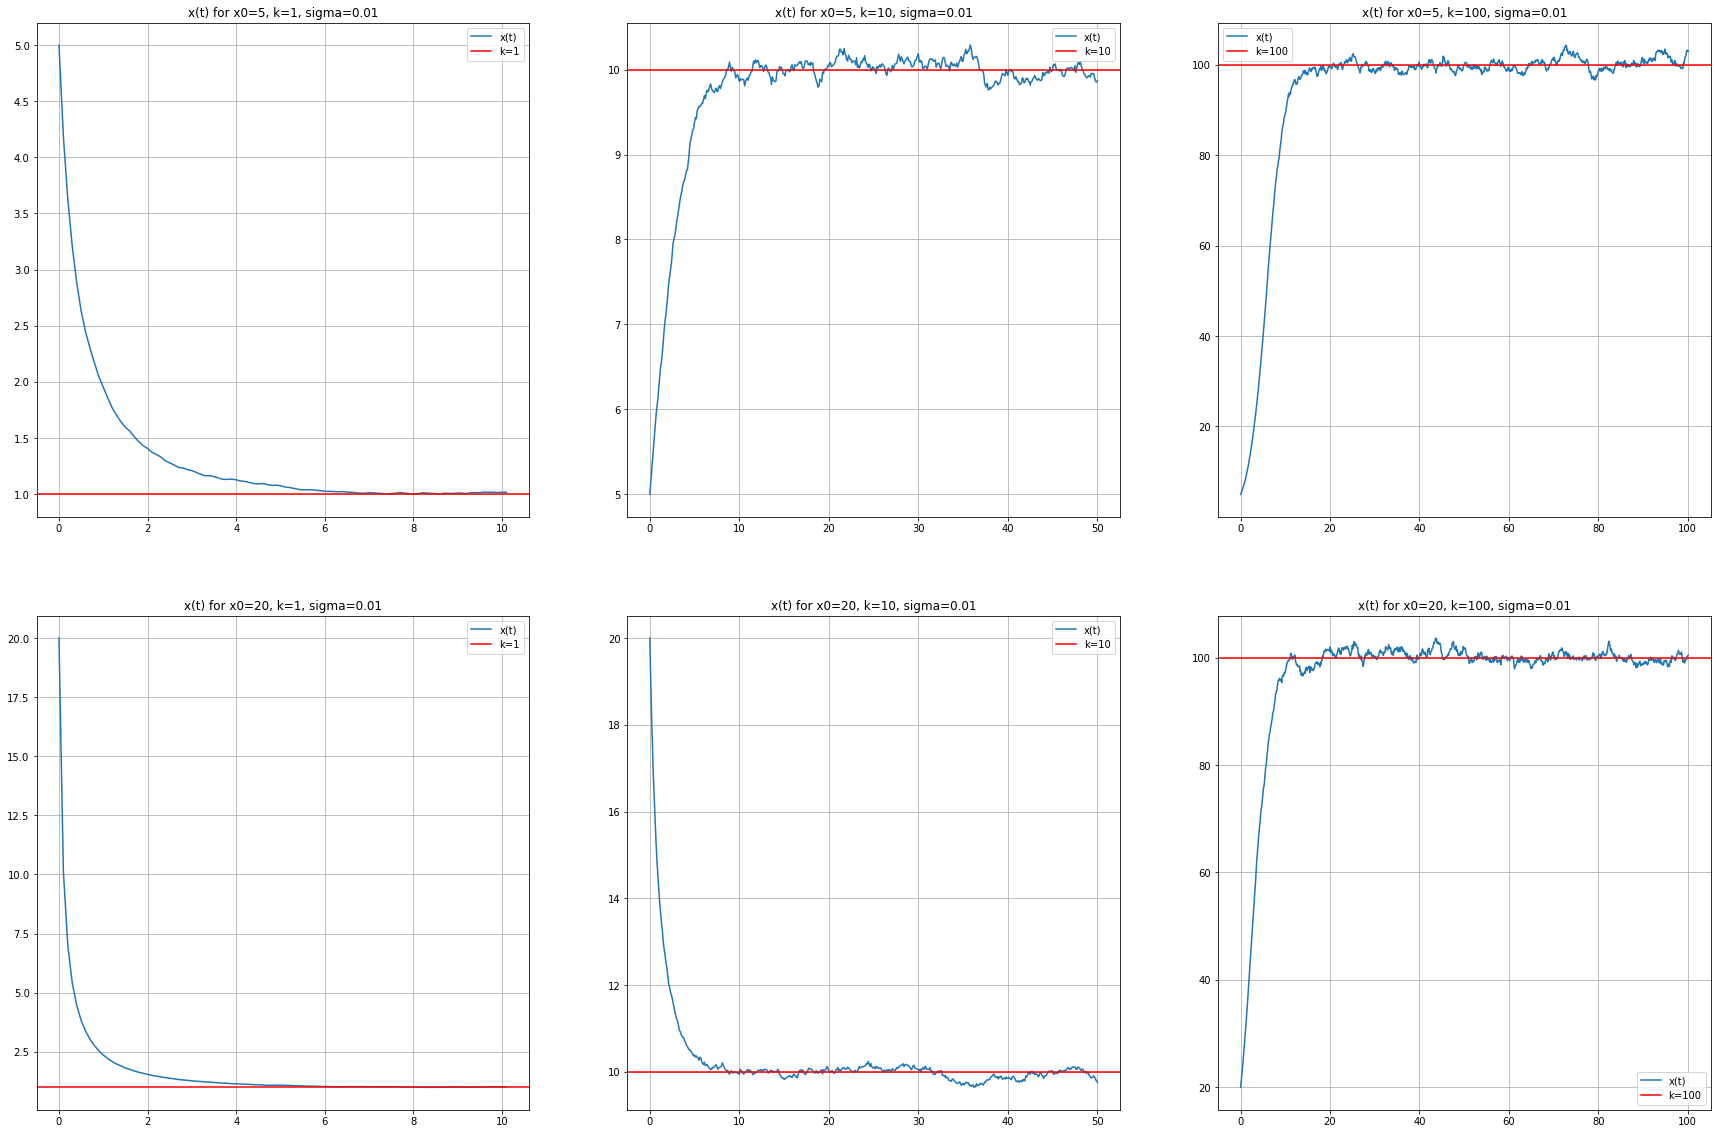

In [14]:
sigma = sigma_range[0]
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,20))
for i, ki in enumerate(k_range):
    k = ki
    t_end = t_end_range[i]
    for j, x in enumerate(x0_range):
        t_values, x_values = rk_logistic(ics, t0, x, t_end, h)
        ax[j][i].plot(t_values, x_values, label="x(t)")
        ax[j][i].axhline(y=k, label="k={}".format(ki), color="red")
        ax[j][i].set_title('x(t) for x0={}, k={}, sigma={}'.format(x,ki,sigma))
        ax[j][i].grid(True)
        ax[j][i].legend()
plt.show()

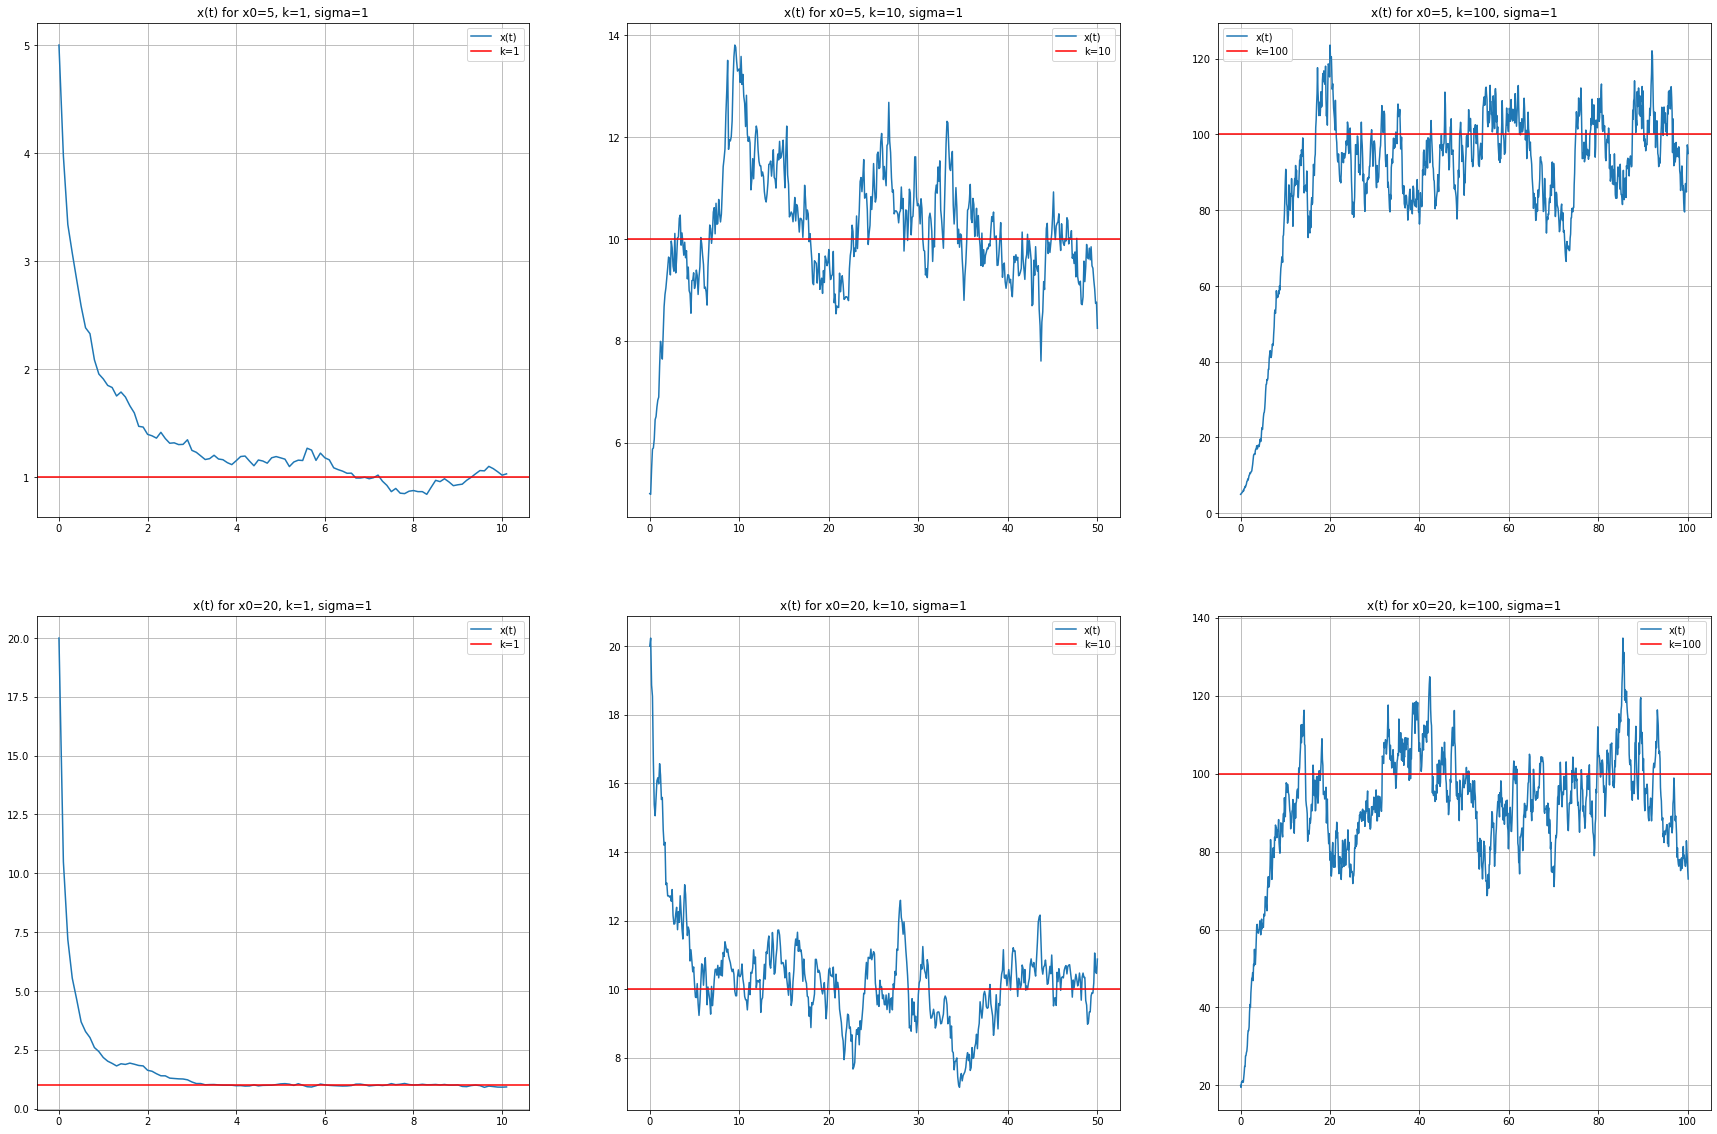

In [15]:
sigma = sigma_range[1]
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,20))
for i, ki in enumerate(k_range):
    k = ki
    t_end = t_end_range[i]
    for j, x in enumerate(x0_range):
        t_values, x_values = rk_logistic(ics, t0, x, t_end, h)
        ax[j][i].plot(t_values, x_values, label="x(t)")
        ax[j][i].axhline(y=k, label="k={}".format(ki), color="red")
        ax[j][i].set_title('x(t) for x0={}, k={}, sigma={}'.format(x,ki,sigma))
        ax[j][i].grid(True)
        ax[j][i].legend()
plt.show()

As can be seen from the above plots the carrying capacity does indeed limit the growth, but without limits on stochstic noise. Also the noise itself is indeed modulated by the $sigma$ parameter, which enhances or suppresses the stochastic contribution.  